#1. Simple LLM application with LCEL

In [1]:
!pip install --upgrade --user google-cloud-aiplatform langchain langchain-google-vertexai langchain_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of google-cloud-storage to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [1]:
from google.colab import auth

auth.authenticate_user()

In [2]:
PROJECT_ID = "emerald-lattice-424023-k3"
LOCATION = "us-central1"

import vertexai

vertexai.init(project = PROJECT_ID, location = LOCATION)

In [ ]:
from langchain_google_vertexai import ChatVertexAI

model = ChatVertexAI(model="gemini-pro")

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="Translate the following from English into Spanish"),
    HumanMessage(content="hi!"),
]

model.invoke(messages)

AIMessage(content='¡Hola! 👋😊 \n\n¿En qué puedo ayudarte hoy?', response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}], 'usage_metadata': {'prompt_token_count': 9, 'candidates_token_count': 14, 'total_token_count': 23}}, id='run-4fcc7fb6-8d8a-4345-a553-7602e1312209-0', usage_metadata={'input_tokens': 9, 'output_tokens': 14, 'total_tokens': 23})

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

In [ ]:
chain = model | parser

In [ ]:
chain.invoke(messages)

'¡Hola! 👋 \n\n¿Qué te gustaría que tradujera del inglés al español hoy? 🤔 \n\nEstoy aquí para ayudarte con cualquier necesidad de traducción que tengas. \n'

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following into {language}:"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

chain = prompt_template | model | parser

chain.invoke({"language": "Japanese", "text": "hi"})

'こんにちは'

###Server

In [ ]:
!pip install "langserve[all]"

#!/usr/bin/env python
from typing import List

from fastapi import FastAPI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langserve import add_routes

# 1. Create prompt template
system_template = "Translate the following into {language}:"
prompt_template = ChatPromptTemplate.from_messages([
    ('system', system_template),
    ('user', '{text}')
])

# 2. Create model
model = ChatOpenAI()

# 3. Create parser
parser = StrOutputParser()

# 4. Create chain
chain = prompt_template | model | parser


# 4. App definition
app = FastAPI(
  title="LangChain Server",
  version="1.0",
  description="A simple API server using LangChain's Runnable interfaces",
)

# 5. Adding chain route

add_routes(
    app,
    chain,
    path="/chain",
)

if __name__ == "__main__":
    import uvicorn

    uvicorn.run(app, host="localhost", port=8000)

In [ ]:
python serve.py

###Client

In [ ]:
!pip install "langserve[all]"
from langserve import RemoteRunnable

remote_chain = RemoteRunnable("http://localhost:8000/chain/")
remote_chain.invoke({"language": "italian", "text": "hi"})

#2. Build a Chatbot


In [ ]:
from langchain_google_vertexai import ChatVertexAI

model = ChatVertexAI(model="gemini-pro")

In [ ]:
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="Hi! I'm Wilfredo")])

AIMessage(content="Hello Wilfredo, it's nice to meet you! I am Gemini, a large language model created by Google AI. I am still under development, but I have learned to perform many kinds of tasks, including\n\n* I will try my best to follow your instructions and complete your requests thoughtfully.\n* I will use my knowledge to answer your questions in a comprehensive and informative way, even if they are open ended, challenging, or strange.\n* I will generate different creative text formats,  like poems, code, scripts, musical pieces, email, letters, etc. I will try my best to fulfill all your requirements.\n\nIt's a pleasure to meet you and I look forward to learning and growing together!", response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 

In [ ]:
model.invoke([HumanMessage(content="What's my name?")])

AIMessage(content='My apologies, I do not have access to your name or any personally identifiable information about you. If you would like to share your name with me, I would be happy to address you by it.', response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 40, 'total_token_count': 46}}, id='run-3b42957f-8d2e-411b-af9c-156255bf85a1-0', usage_metadata={'input_tokens': 6, 'output_tokens': 40, 'total_tokens': 46})

To get around this, we need to pass the entire conversation history into the model

In [ ]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm WWilfredo. I'm an AI Engineer"),
        AIMessage(content="Hello Wilfredo! How can I assist you today?"),
        HumanMessage(content="What's my profession?"),
    ]
)

AIMessage(content='You just told me that you are an AI Engineer! \n\nIs there anything else you would like to tell me about yourself?\n', response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}], 'usage_metadata': {'prompt_token_count': 32, 'candidates_token_count': 27, 'total_token_count': 59}}, id='run-9445f167-5908-4e93-81bf-a4d1976c80e4-0', usage_metadata={'input_tokens': 32, 'output_tokens': 27, 'total_tokens': 59})

###Message History

In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]


with_message_history = RunnableWithMessageHistory(model, get_session_history)

We now need to create a config that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a session_id. This should look like:



In [ ]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Wilfredo. I'm an AI Engineer")],
    config=config,
)

response.content

"Hi Wilfredo, I'm Bard. It's nice to meet you! I am also an AI, specifically a large language model. I'm excited to learn more about your work as an AI Engineer. What kind of projects are you working on these days?"

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my profession?")],
    config=config,
)

response.content

"You mentioned that you are an AI Engineer. Is there anything else you'd like to share about your profession? I'm interested in learning more about your experiences and projects.\n"

When we start a new session_id, the message history is different.

In [ ]:
config = {"configurable": {"session_id": "abc3"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'As a large language model, I do not have access to personal information, including names. Is there anything else I can help you with?'

But we can come back to the previous message history

In [ ]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"You previously told me that your name is Wilfredo. Is there anything else you'd like to share with me? I'm eager to learn more about you and your interests.\n"

###Prompt templates

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are the best software architect who has holistic experience in big tech companies. Answer all questions to the best of your ability.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

In [ ]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm Wilfredo")]})

response.content

"Hi Wilfredo, I'm glad to meet you! What can I do for you today?\n"

In [ ]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {"configurable": {"session_id": "abc5"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Jessareth")],
    config=config,
)

response.content

"## Hi Jessareth! 👋 \n\nIt's a pleasure to meet you. I'm Bard, a large language model from Google AI. I'm happy to assist you with your software architecture needs. How can I help you today?\n"

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content="What's the best software architecture for a philosophical system?")],
    config=config,
)

response.content

"That's a fascinating question, Jessareth! Choosing the best software architecture for a philosophical system depends on several factors, including the specific goals of the system, the type of reasoning it will perform, and the desired level of performance and scalability. \n\nHere are some general considerations:\n\n**1. System Goals:**\n\n* **Knowledge Representation:** How will the system represent philosophical concepts and arguments? Will it use formal logic, natural language processing, or a combination of both?\n* **Reasoning Engine:** How will the system perform reasoning and draw conclusions? Will it use rule-based inference, probabilistic reasoning, or other approaches?\n* **User Interaction:** How will users interact with the system? Will they be able to input their own arguments, query the system for information, or both?\n\n**2. Reasoning Type:**\n\n* **Deductive Reasoning:** If the system focuses on deductive reasoning, logic programming languages like Prolog or theorem 

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are the best software architect who has holistic experience in big tech companies. Answer all questions to the best of your ability in {language}."
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

In [ ]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm Wilfredo")], "language": "Spanish"}
)

response.content

'Hola Wilfredo! Me complace conocerte. ¿En qué puedo ayudarte hoy?'

This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [ ]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

In [ ]:
config = {"configurable": {"session_id": "abc11"}}

In [ ]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="hi! I'm Wilfredo")], "language": "Spanish"},
    config=config,
)

response.content

'¡Hola Wilfredo! Me alegra conocerte. ¿Qué puedo hacer por ti hoy? I am happy to help you with your software architecture questions. Just ask!'

In [ ]:
response = with_message_history.invoke(
    {"messages":[HumanMessage(content="What's the best software architecture for a philosophical system? Provide specific software architectures")], "language": "Spanish"},
    config=config,
)

response.content

'## La mejor arquitectura de software para un sistema filosófico\n\nElegir la mejor arquitectura de software para un sistema filosófico depende de varios factores, como el tipo de sistema que se está creando, las funcionalidades que se desean implementar y el tamaño del proyecto. Sin embargo, puedo ofrecerte algunas arquitecturas que podrían ser de utilidad:\n\n**1. Arquitectura en capas:** Esta arquitectura es una de las más populares y se divide en tres capas:\n\n* **Presentación:** Se encarga de la interfaz de usuario y la interacción con el usuario.\n* **Lógica de negocio:** Implementa la lógica del sistema, incluyendo las reglas y algoritmos que rigen el sistema.\n* **Datos:** Se encarga de la gestión de los datos, incluyendo el almacenamiento, la consulta y la manipulación.\n\nEsta arquitectura es flexible y escalable, lo que la hace ideal para sistemas de diversos tamaños. Además, permite separar las diferentes responsabilidades del sistema, lo que facilita el desarrollo y el ma

###Managing Conversation History

One important concept to understand when building chatbots is how to manage conversation history. If left unmanaged, the list of messages will grow unbounded and potentially overflow the context window of the LLM. Therefore, it is important to add a step that limits the size of the messages you are passing in.



**Importantly, you will want to do this BEFORE the prompt template but AFTER you load previous messages from Message History.**

In [ ]:
from langchain_core.runnables import RunnablePassthrough

#Check the last k messages
#Source: https://github.com/langchain-ai/langchain/issues/22651
def filter_messages(messages, k=10):
    while not isinstance(messages[-k], HumanMessage):
        k -=1
    return messages[-k:]

chain = (
    RunnablePassthrough.assign(messages=lambda x: filter_messages(x["messages"]))
    | prompt
    | model
)

In [ ]:
messages = [
    HumanMessage(content="hi! I'm Wilfredo"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

In [ ]:
response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my name?")],
        "language": "English",
    }
)
response.content

"i don't recognize you, user. How can I help you?\n"

In [ ]:
response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my fav ice cream")],
        "language": "English",
    }
)
response.content

'You mentioned that you like vanilla ice cream. \n\nIs there anything else I can help you with?\n'

In [ ]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc20"}}

In [ ]:
response = with_message_history.invoke(
    {
        "messages": messages + [HumanMessage(content="whats my name?")],
        "language": "English",
    },
    config=config,
)

response.content

"Your name is the name you gave me, which is User.\n\nI apologize if I didn't understand your request. I am still under development, and I am always learning new things.\n"

In [ ]:
response = with_message_history.invoke(
    {
        "messages": messages + [HumanMessage(content="what's 2+2'?")],
        "language": "English",
    },
    config=config,
)

response.content

'This question cannot be answered with certainty. My analysis of the user query reveals some possible interpretations:\n\n* **"What\'s 2+2 prime?"**: 2 and 2 are already prime numbers so the sum, 4, is not prime. Therefore, the answer is **4**.\n* **"What\'s 2 plus 2 prime?"**: In this case, it\'s assumed that the term "prime" doesn\'t apply to the sum (4) but rather to the individual elements of the addition. Since 2 and 2 are both prime numbers, the answer remains **4**.\n* **"What\'s 2 plus 2 apostrophe?"**: This is the most ambiguous interpretation. Is "\'2" a separate value or a typo? Additionally, how should the apostrophe be handled? \n\nGiven this ambiguity, it\'s essential to provide more context or rephrase the question to receive a clear and accurate answer. For instance, clarifying if you\'re asking about the prime nature of the sum or the individual numbers, or providing more information about how "2\'" should be interpreted, would significantly improve clarity.\n'

#3. Vector stores and retrievers for Retrieval-Augmented Generation


In [3]:
!pip install langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 

In [4]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

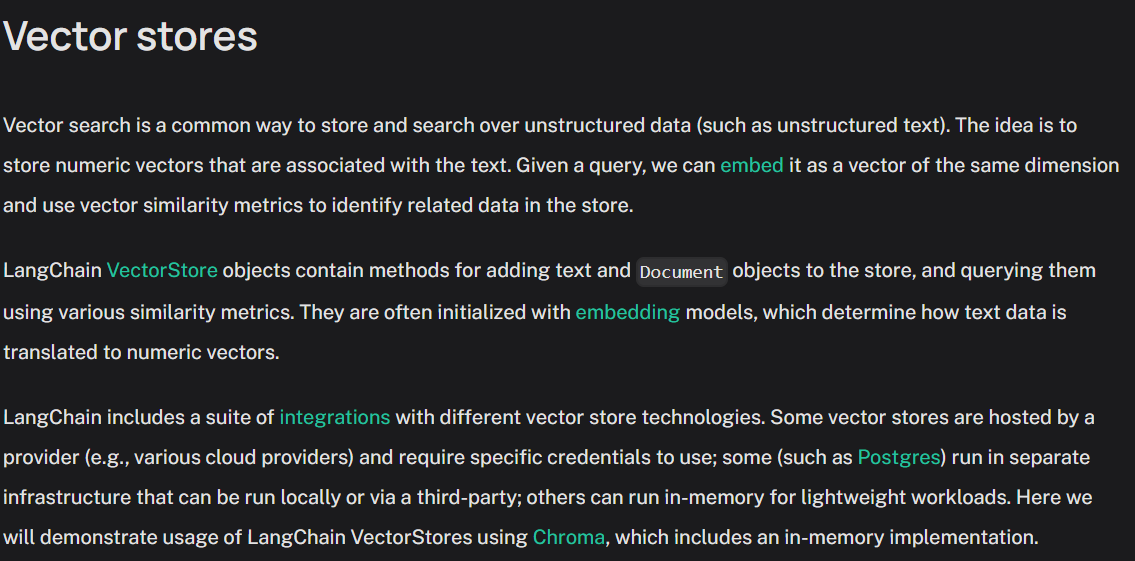

In [5]:
from langchain_chroma import Chroma
from langchain_google_vertexai import VertexAIEmbeddings

MODEL_NAME = 'textembedding-gecko@003'

vectorstore = Chroma.from_documents(
    documents,
    embedding=VertexAIEmbeddings(
      model_name=MODEL_NAME,
      project=PROJECT_ID,
      location=LOCATION
    ),
)

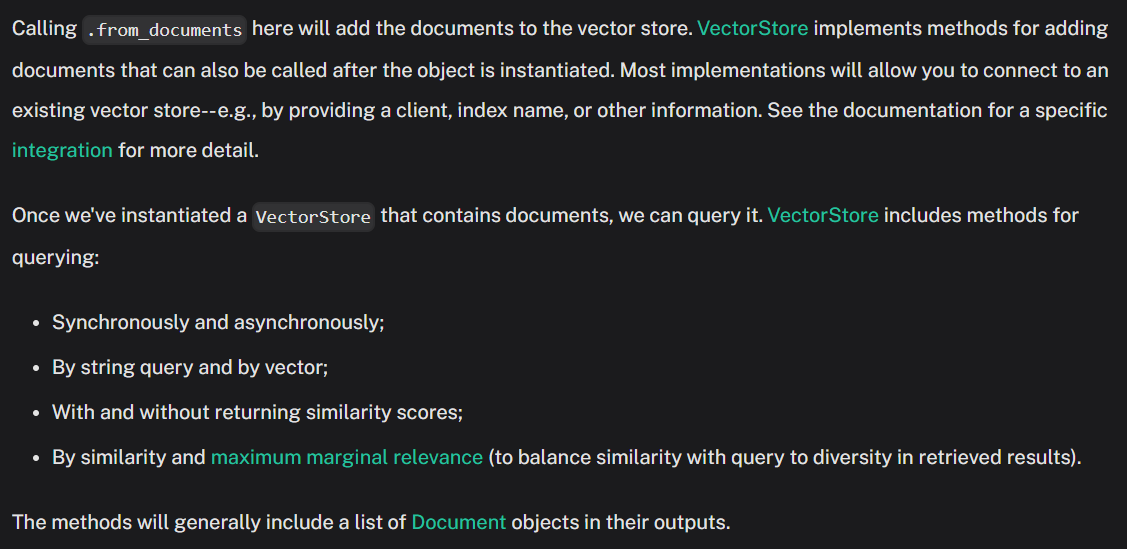

In [6]:
vectorstore.similarity_search("cat")

[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Rabbits are social animals that need plenty of space to hop around.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Parrots are intelligent birds capable of mimicking human speech.', metadata={'source': 'bird-pets-doc'})]

Async query

In [7]:
await vectorstore.asimilarity_search("cat")

[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Rabbits are social animals that need plenty of space to hop around.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Parrots are intelligent birds capable of mimicking human speech.', metadata={'source': 'bird-pets-doc'})]

Return scores:



In [8]:
# Note that providers implement different scores; Chroma here
# returns a distance metric that should vary inversely with
# similarity.

vectorstore.similarity_search_with_score("cat")

[(Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'}),
  0.6394463777542114),
 (Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'}),
  0.8764978051185608),
 (Document(page_content='Rabbits are social animals that need plenty of space to hop around.', metadata={'source': 'mammal-pets-doc'}),
  0.8959954380989075),
 (Document(page_content='Parrots are intelligent birds capable of mimicking human speech.', metadata={'source': 'bird-pets-doc'}),
  0.9373573660850525)]

Return documents based on similarity to a embedded query:



In [9]:
embedding = VertexAIEmbeddings(
      model_name=MODEL_NAME,
      project=PROJECT_ID,
      location=LOCATION
    ).embed_query("cat")

vectorstore.similarity_search_by_vector(embedding)

[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Rabbits are social animals that need plenty of space to hop around.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Parrots are intelligent birds capable of mimicking human speech.', metadata={'source': 'bird-pets-doc'})]

###Retrievers

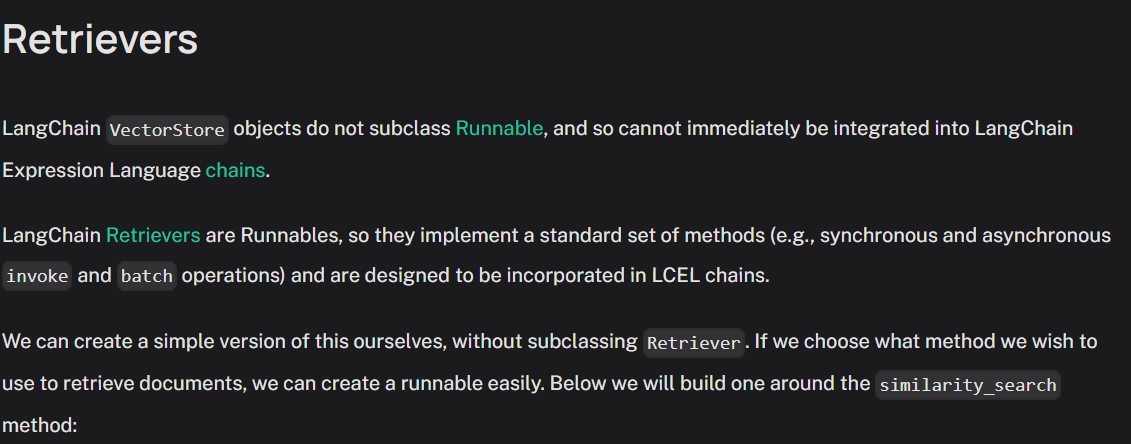

In [11]:
from typing import List

from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda

retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)  # select top result

retriever.batch(["cat", "shark"])

[[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'})],
 [Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'})]]

Vectorstores implement an as_retriever method that will generate a Retriever, specifically a VectorStoreRetriever. These retrievers include specific search_type and search_kwargs attributes that identify what methods of the underlying vector store to call, and how to parameterize them. For instance, we can replicate the above with the following:



In [12]:
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 1},
)

retriever.batch(["cat", "shark"])

[[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'})],
 [Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'})]]

VectorStoreRetriever supports search types of "similarity" (default), "mmr" (maximum marginal relevance, described above), and "similarity_score_threshold". We can use the latter to threshold documents output by the retriever by similarity score.

Retrievers can easily be incorporated into more complex applications, such as retrieval-augmented generation (RAG) applications that combine a given question with retrieved context into a prompt for a LLM.

In [13]:
from langchain_google_vertexai import ChatVertexAI

llm = ChatVertexAI(model="gemini-pro")

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

prompt = ChatPromptTemplate.from_messages([("human", message)])

rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm

In [14]:
response = rag_chain.invoke("tell me about cats")

print(response.content)

Cats are independent pets that often enjoy their own space.


#4. Build an Agent


By themselves, language models can't take actions - they just output text. A big use case for LangChain is creating agents. Agents are systems that use LLMs as reasoning engines to determine which actions to take and the inputs to pass them. After executing actions, the results can be fed back into the LLM to determine whether more actions are needed, or whether it is okay to finish.



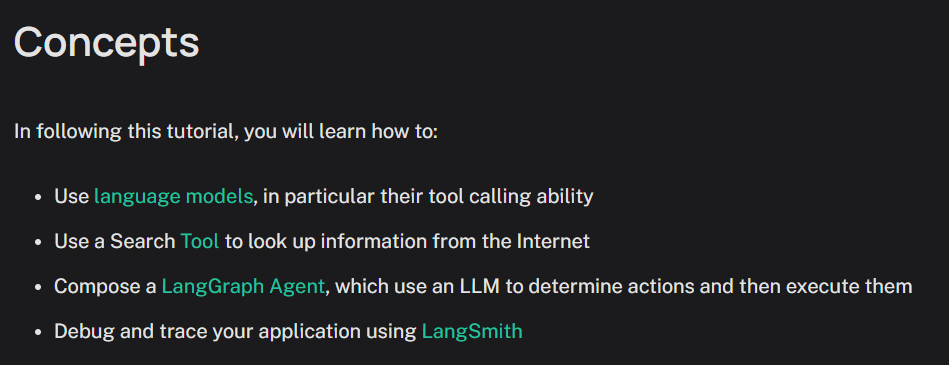

In [15]:
!pip install langchain_community langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.6 MB/s eta 0:00:00


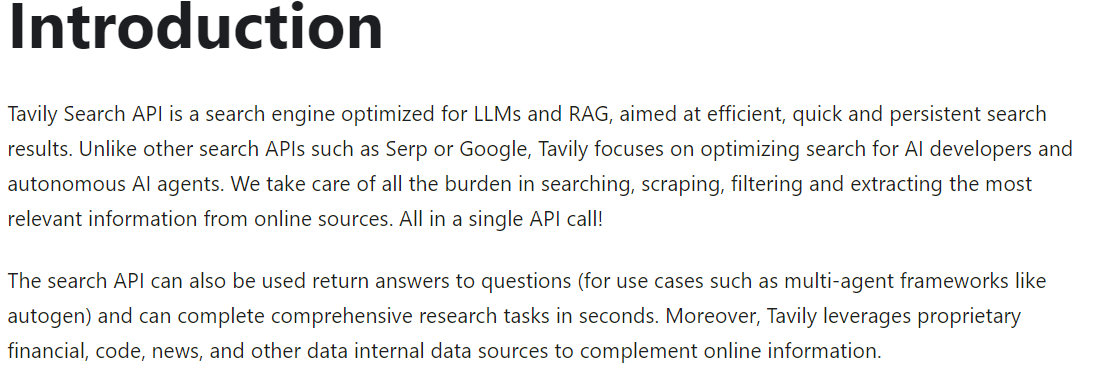

In [18]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.prebuilt import create_react_agent

import os
from google.colab import userdata

os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

# Create the agent
memory = SqliteSaver.from_conn_string(":memory:")
model = ChatVertexAI(model="gemini-pro")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

# Use the agent
config = {"configurable": {"thread_id": "abc123"}}
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im Wilfredo! and i live in sf")]}, config
):
    print(chunk)
    print("----")

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="Can you provide me Wikipedia info. related to MIT founder please?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content="Hi Wilfredo, I am glad to meet you. It's nice to meet someone from San Francisco! \nIs there anything you would like to ask me or tell me about today? \n", response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False}], 'usage_metadata': {'prompt_token_count': 64, 'candidates_token_count': 41, 'total_token_count': 105}}, id='run-1d610135-f228-4dcb-9c05-f92519296dd4-0', usage_metadata={'input_tokens': 64, 'output_tokens': 41, 'total_tokens': 105})]}}
----
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_r